#### PROJECT: JSON BASED DATA EXERCISE - SECTION 5.2

submitted by Maya Bhat-Gregerson

In [20]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# load data as data frame and explore

wb_df = pd.read_json('data/world_bank_projects.json')

print(wb_df.shape)


(500, 50)


In [4]:
# Problem 1. Find the 10 countries with most projects
'''assuming each row represents a unique project:'''

print(wb_df['countryshortname'].value_counts().head(10))

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64


In [14]:
# Problem 2. Find the top 10 major project themes (using column 'mjtheme_namecode') 

'''Load json data as string before normalizing and counting most frequent major themes'''
'''As the top 10 projects includes a blank value I used .head(15) to improve the chances of 
getting 10 valid (non-null) counts'''

wbdata_str = json.load((open('data/world_bank_projects.json')))
theme_table = json_normalize(wbdata_str, 'mjtheme_namecode')


print("FIRST TEN ROWS OF THEME_TABLE")
print(theme_table.head(10))


print("")
print("MOST COMMON PROJECTS")
print(theme_table['name'].value_counts().head(15))


FIRST TEN ROWS OF THEME_TABLE
  code                                          name
0    8                             Human development
1   11                                              
2    1                           Economic management
3    6         Social protection and risk management
4    5                         Trade and integration
5    2                      Public sector governance
6   11  Environment and natural resources management
7    6         Social protection and risk management
8    7                   Social dev/gender/inclusion
9    7                   Social dev/gender/inclusion

MOST COMMON PROJECTS
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
S

In [ ]:
# Problem 3. In 2. above you will notice that some entries have only the code and the name is missing. 
# Create a dataframe with the missing names filled in.

In [16]:
'''Create a dataframe of theme codes and corresponding theme names
i.e. each code appears once with the corresponding theme name'''

a = theme_table.groupby(['code', 'name']).count()
a = pd.DataFrame(a).reset_index()
a['name'].replace('', np.nan, inplace=True)
a=a.dropna(axis=0, subset=['name'])
a

,code,name
1,1,Economic management
3,10,Rural development
5,11,Environment and natural resources management
7,2,Public sector governance
9,3,Rule of law
11,4,Financial and private sector development
13,5,Trade and integration
15,6,Social protection and risk management
17,7,Social dev/gender/inclusion
19,8,Human development


In [17]:
'''Merge the two dataframes and clean up columns and column labels'''

b = theme_table.merge(a, how='left', on='code')
b = b.drop(['name_x'], axis=1).rename(columns = {'code':'Major Theme Code', 
                                         'name_y':'Major Theme Name'})
b

,Major Theme Code,Major Theme Name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


Text(0.5, 0, 'COUNTS')

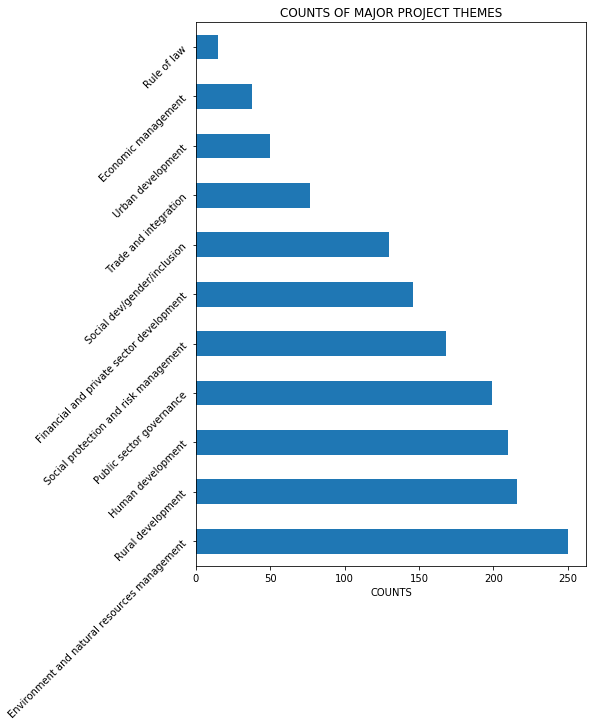

In [36]:
graph = b['Major Theme Name'].value_counts().plot(kind='barh', 
                                          figsize=(7, 10), 
                                          rot=45,
                                          title="COUNTS OF MAJOR PROJECT THEMES",
                                         )
graph.set_xlabel("COUNTS")
